Using autodiff for regression using torch

In [1]:
import torch 
import matplotlib.pyplot as plt 

In [2]:
x = torch.tensor([0,1,2,3,4,5,6,7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

$y = mx + b$  
$ m = -0.5 ,  b = 2 $ 

In [3]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

In [4]:
fig , ax = plt.subplots()
plt.title('Clinical trial')
plt.xlabel('Drug dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x,y)

Initialize the slope parameter $m$ with a "random" value of 0.9...  

(N.B.: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

In [30]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

..and do the same for the $y$-intercept parameter $b$:

In [31]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [7]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [8]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

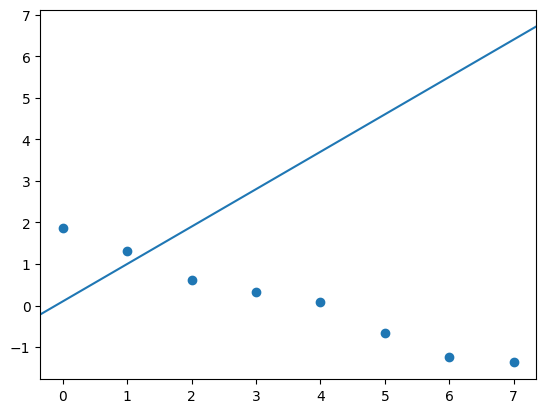

In [9]:
regression_plot(x, y, m, b)

Machine learning

**Step-1**: Forward pass

In [37]:
yhat = regression(x,m,b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$  
There is a PyTorch `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [38]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [39]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step-3** : Use autodiff to calculate gradient C w.r.t parameters 

In [13]:
C.backward()

In [14]:
m.grad

tensor([36.3050])

In [15]:
b.grad

tensor([6.2650])

**Step-4**: Gradient Descent

In [16]:
optimizer = torch.optim.SGD([m,b] , lr=0.01) # lr=alpha

In [17]:
optimizer.step()

confirming parmeters have been adjusted

In [18]:
m

tensor([0.5369], requires_grad=True)

In [19]:
b


tensor([0.0374], requires_grad=True)

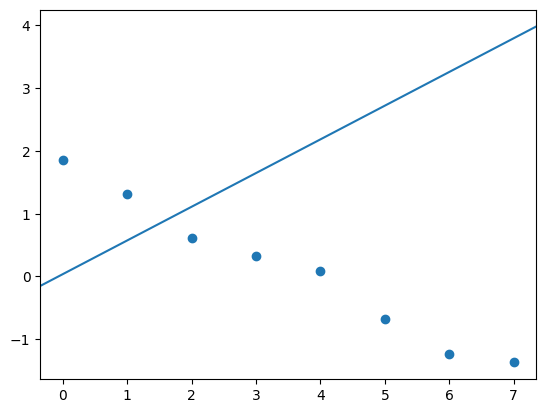

In [20]:
regression_plot(x,y,m,b)

we can repeat steps 1 and 2 to confirm cost has decreased

In [22]:
C = mse(regression(x,m,b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

put step 4 in loop to iteratively minimize cost toward zero

In [23]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad() # resets gradient to zero else they accumulate 

    yhat = regression(x,m,b) # step 1
    C = mse(yhat,y) # step 2

    C.backward() # step 3
    optimizer.step() # step 4 

    print('Epoch {}, cost {}, m grad {}, b grad {}' .format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item(), '%.3g'))

Epoch 0, cost 8.57, m grad 23.2, b grad 3.6
Epoch 1, cost 4.08, m grad 14.8, b grad 1.91
Epoch 2, cost 2.25, m grad 9.49, b grad 0.831
Epoch 3, cost 1.51, m grad 6.11, b grad 0.15
Epoch 4, cost 1.2, m grad 3.96, b grad -0.28
Epoch 5, cost 1.07, m grad 2.59, b grad -0.552
Epoch 6, cost 1.01, m grad 1.72, b grad -0.723
Epoch 7, cost 0.981, m grad 1.17, b grad -0.829
Epoch 8, cost 0.962, m grad 0.82, b grad -0.894
Epoch 9, cost 0.948, m grad 0.595, b grad -0.934
Epoch 10, cost 0.936, m grad 0.452, b grad -0.957
Epoch 11, cost 0.925, m grad 0.361, b grad -0.969
Epoch 12, cost 0.915, m grad 0.302, b grad -0.975
Epoch 13, cost 0.904, m grad 0.265, b grad -0.977
Epoch 14, cost 0.894, m grad 0.241, b grad -0.976
Epoch 15, cost 0.884, m grad 0.225, b grad -0.973
Epoch 16, cost 0.874, m grad 0.214, b grad -0.969
Epoch 17, cost 0.864, m grad 0.207, b grad -0.965
Epoch 18, cost 0.854, m grad 0.202, b grad -0.96
Epoch 19, cost 0.845, m grad 0.199, b grad -0.955
Epoch 20, cost 0.835, m grad 0.196, b

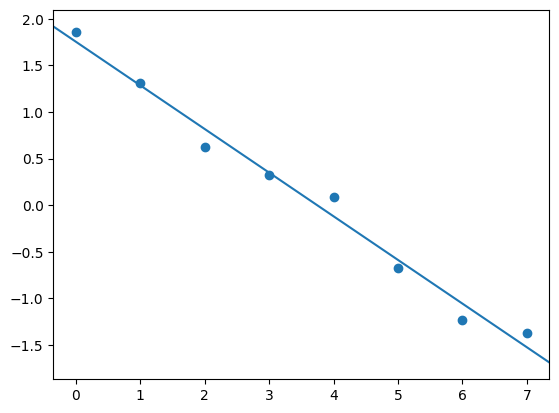

In [24]:
regression_plot(x,y,m,b)

In [27]:
m.item()

-0.4681258499622345

In [29]:
b.item()

1.7542961835861206